In [3]:
#!/usr/bin/env python
%matplotlib inline

#from PyOPC.OPCContainers import *
#from PyOPC.XDAClient import XDAClient

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sqlalchemy import create_engine # database connection
import datetime as dt
from IPython.display import display
from IPython.display import clear_output

import scipy.stats

#http://pyopc.sourceforge.net/
#https://plot.ly/python/big-data-analytics-with-pandas-and-sqlite/

In [4]:
disk_engine = create_engine('sqlite:///egneos2.db')

In [21]:
df = pd.read_sql_query('SELECT *'
                       ' FROM Wecstd_Raw limit 3500 offset (select count(*) FROM Wecstd_Raw)-3500'
                       , disk_engine)
df.index=pd.DatetimeIndex(df["index"])
df.drop('index', axis=1, inplace=True)
pd.read_sql_query('SELECT Count(*) '
                       'FROM Wecstd_Raw '
                       , disk_engine)

,Count(*)
0,51747


In [22]:
df.head()

,Source,Values,MitVwind,MaxVwind,MinVwind,MitNRotor,MaxNRotor,MinNRotor,MitP,MaxP,...,PavaExtern,Pitch,?1,?2,?3,?4,?5,?6,?7,?8
2016-03-22 08:57:00,Raw,1,6.9,8.6,4.8,10.48,11.29,9.76,903,1131,...,914,1,65.535003,65.535003,65.535003,6553.500098,6553.500098,6553.500098,300,65535
2016-03-22 08:58:00,Raw,1,7.4,9.0,6.5,10.68,11.45,9.89,960,1183,...,960,1,65.535003,65.535003,65.535003,6553.500098,6553.500098,6553.500098,300,65535
2016-03-22 08:59:00,Raw,1,7.7,9.0,6.1,11.33,12.54,10.09,1167,1593,...,1114,1,65.535003,65.535003,65.535003,6553.500098,6553.500098,6553.500098,300,65535
2016-03-22 09:00:00,Raw,1,7.8,9.2,6.7,11.77,12.27,10.94,1307,1488,...,1260,1,65.535003,65.535003,65.535003,6553.500098,6553.500098,6553.500098,300,65535
2016-03-22 09:01:00,Raw,1,8.4,9.5,7.4,11.66,12.29,11.03,1252,1484,...,1210,1,65.535003,65.535003,65.535003,6553.500098,6553.500098,6553.500098,300,65535


In [23]:
df.columns

Index([u'Source', u'Values', u'MitVwind', u'MaxVwind', u'MinVwind',
       u'MitNRotor', u'MaxNRotor', u'MinNRotor', u'MitP', u'MaxP', u'MinP',
       u'GoPos', u'Hour', u'Wexp', u'Minutes', u'MitQ', u'MaxQ', u'MinQ',
       u'PavaVwind', u'PavaTech', u'PavaForceM', u'PavaExtern', u'Pitch',
       u'?1', u'?2', u'?3', u'?4', u'?5', u'?6', u'?7', u'?8'],
      dtype='object')

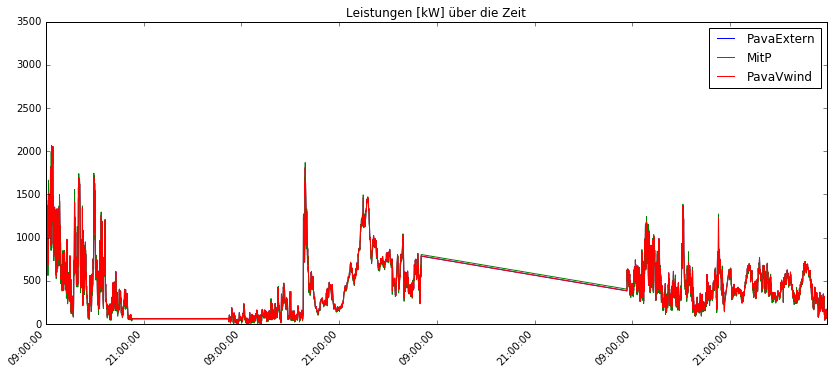

In [24]:
df[[u'PavaExtern','MitP','PavaVwind']].plot(rot=45,ylim=(0,3500),figsize=(14,6))
plt.title(u'Leistungen [kW] über die Zeit');

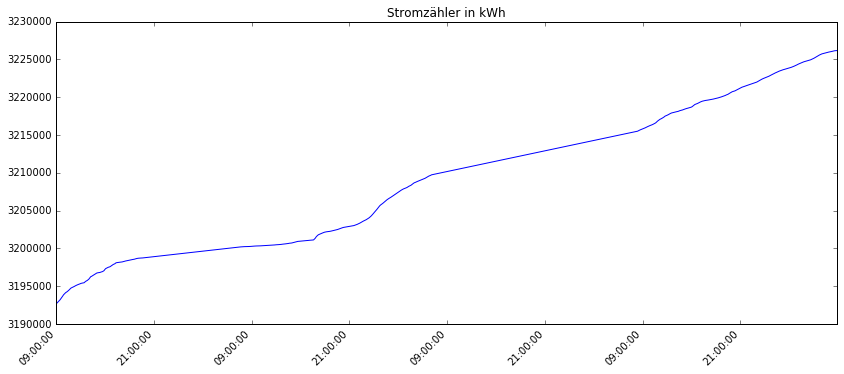

In [25]:
df['Wexp'].plot(rot=45,figsize=(14,6));
plt.title(u'Stromzähler in kWh');

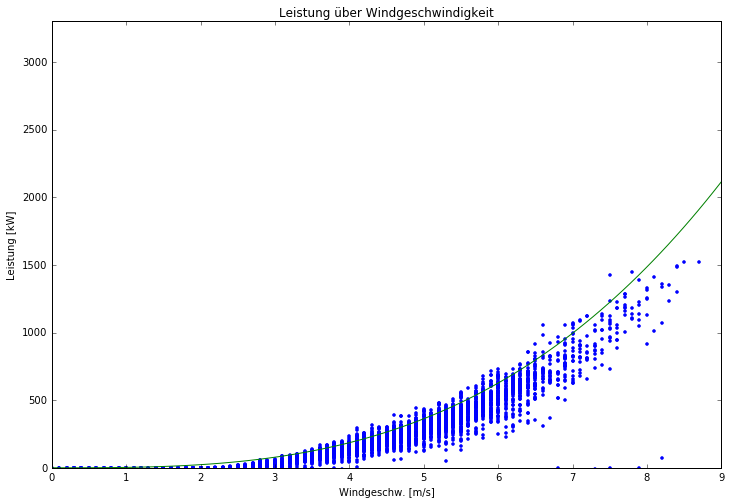

In [378]:
fig=plt.figure(figsize=(12,8))
plt.plot(df[u'MitVwind'],df[[u'MitP']],'.')
x1,x2,y1,y2 = plt.axis()
v=np.linspace(0,10,100)
power=2.9*v**3
plt.plot(v,power)
plt.axis((0,x2,0,3300));
plt.xlabel("Windgeschw. [m/s]")
plt.ylabel("Leistung [kW]");
plt.title(u'Leistung über Windgeschwindigkeit');

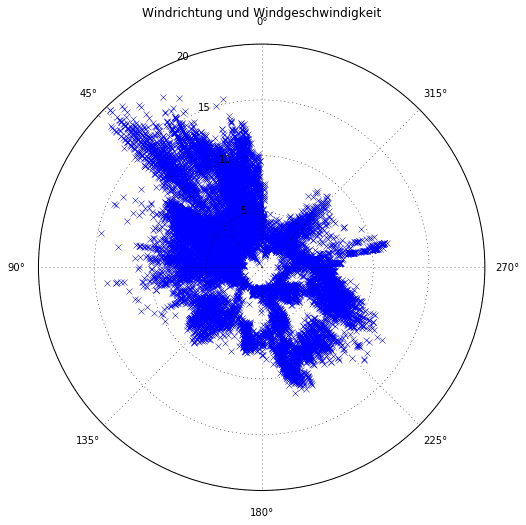

In [299]:
fig=plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')

ax.plot(np.pi+df[[u'GoPos']].values*np.pi/180,df[[u'MitVwind']].values,'x')
ax.set_theta_zero_location("N")
ax.set_rmax(20)
ax.grid(True)
plt.title('Windrichtung und Windgeschwindigkeit');

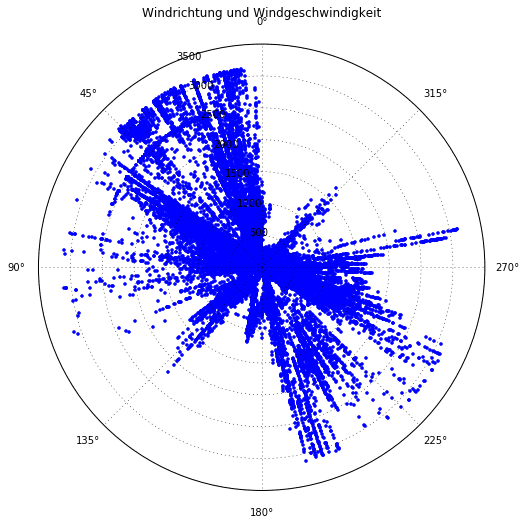

In [326]:
fig=plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')

ax.plot(np.pi+df[[u'GoPos']].values*np.pi/180,df[[u'MitP']].values,'.')
ax.set_theta_zero_location("N")
ax.set_rmax(3500)
ax.grid(True)
plt.title('Windrichtung und Windgeschwindigkeit');

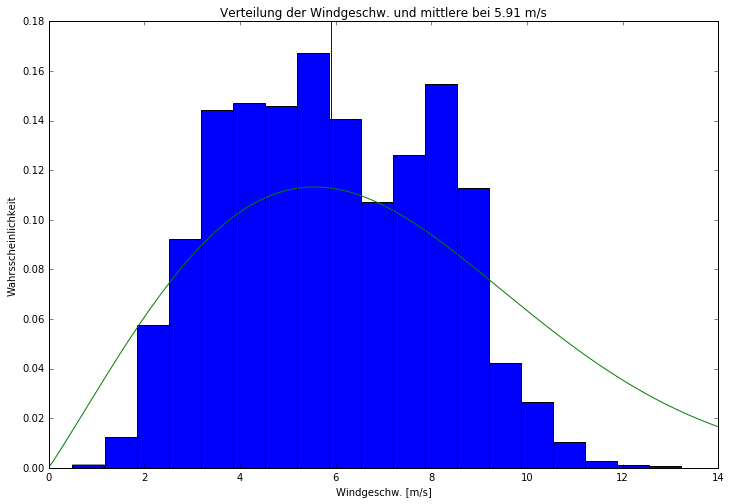

In [292]:
fig=plt.figure(figsize=(12,8))
plt.hist(df[[u'MitVwind']].values,normed=True,bins=20);
x1,x2,y1,y2 = plt.axis()
plt.axis((0,x2,0,y2));
mean=df[[u'MitVwind']].mean().values[0]
plt.axvline(mean);
rv = scipy.stats.exponweib(1.0, 2.05, scale=7.7)  #Prognose mit mittel. vWind 7.7m/s, k=2.05 und x=1 ?
x_range = np.arange(0, 30, 0.1)
plt.plot(x_range, rv.pdf(x_range));
plt.title('Verteilung der Windgeschw. und mittlere bei ' +"%.2f"% mean +" m/s")
plt.xlabel("Windgeschw. [m/s]")
plt.ylabel("Wahrsscheinlichkeit"); #ToDo Weibull-Verteilung;

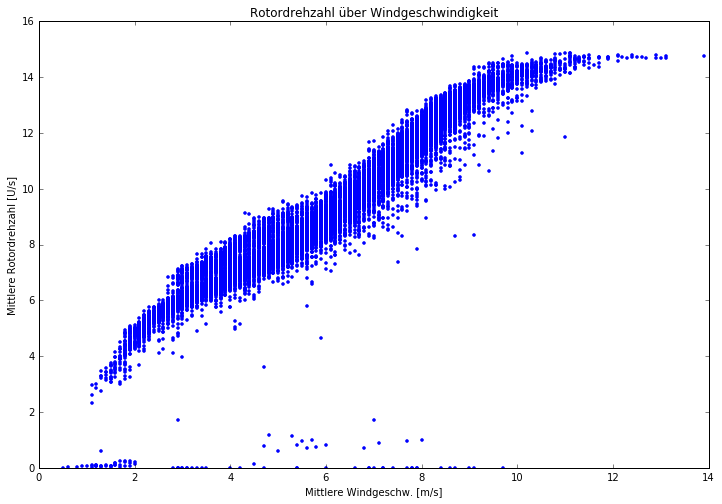

In [291]:
fig=plt.figure(figsize=(12,8))
plt.plot(df[u'MitVwind'].values  ,df[[u'MitNRotor']].values,'.')
plt.xlabel(u'Mittlere Windgeschw. [m/s]')
plt.ylabel(u'Mittlere Rotordrehzahl [U/s]')
x1,x2,y1,y2 = plt.axis()
plt.axis((0,x2,0,y2));
plt.title(u'Rotordrehzahl über Windgeschwindigkeit');

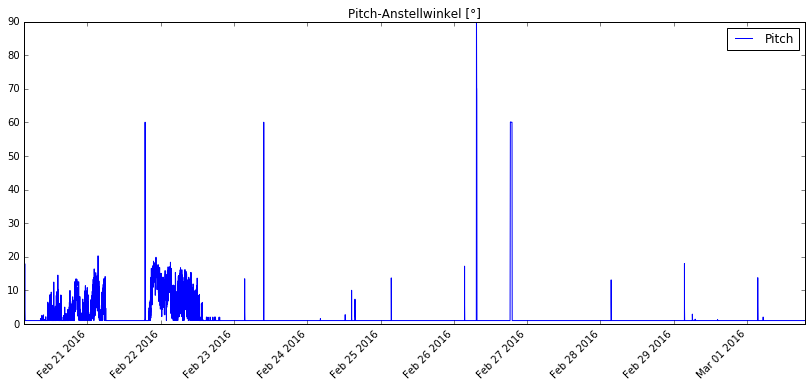

In [259]:
df[[u'Pitch']].plot(rot=45,ylim=(0,90),figsize=(14,6));
plt.title(u'Pitch-Anstellwinkel [°]');

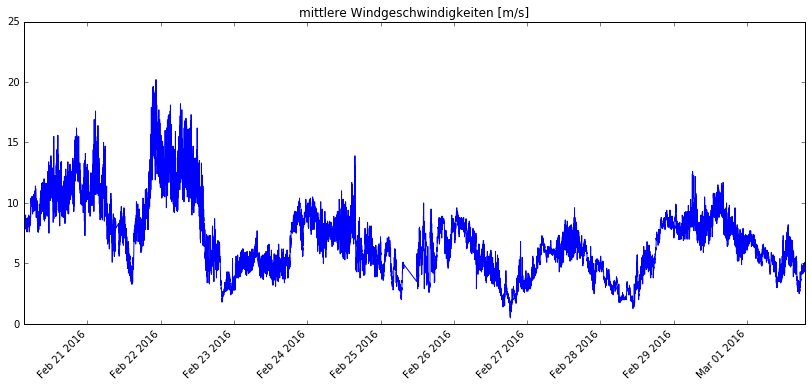

In [260]:
df.MitVwind.plot(rot=45,ylim=(0,25),figsize=(14,6));
plt.title(u'mittlere Windgeschwindigkeiten [m/s]');

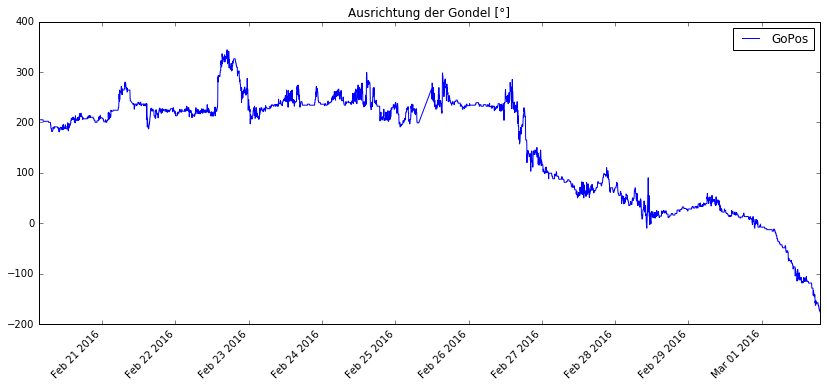

In [261]:
df[['GoPos']].plot(rot=45,figsize=(14,6));
plt.title(u'Ausrichtung der Gondel [°]');

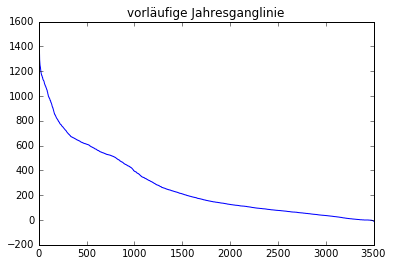

In [363]:
plt.plot(-np.sort(-df['MitP'].values))
plt.title(u'vorläufige Jahresganglinie');

## Temperaturen

In [271]:
df_temp = pd.read_sql_query('SELECT *'
                       ' FROM T101a1_Rep limit 15000 offset (select count(*) FROM T101a1_Rep)-15000'
                       , disk_engine)

df_temp.index=pd.DatetimeIndex(df_temp["index"])
df_temp.drop('index', axis=1, inplace=True)
df_temp.shape

(1190, 27)

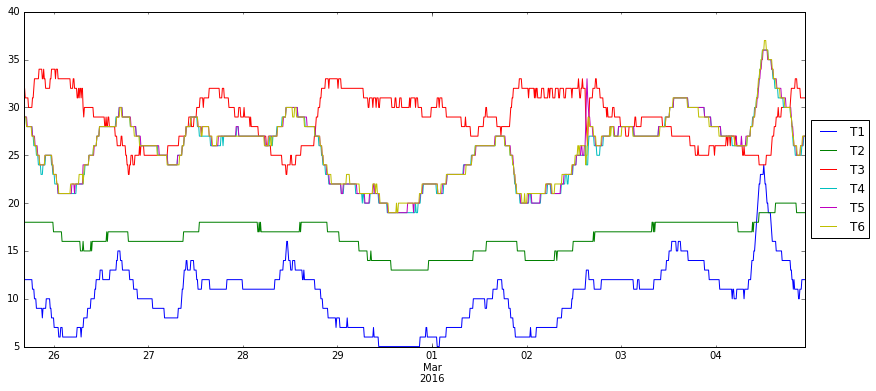

In [272]:
df_temp.ix[:,2:8].plot(figsize=(14,6)).legend(loc='center left', bbox_to_anchor=(1, 0.5));

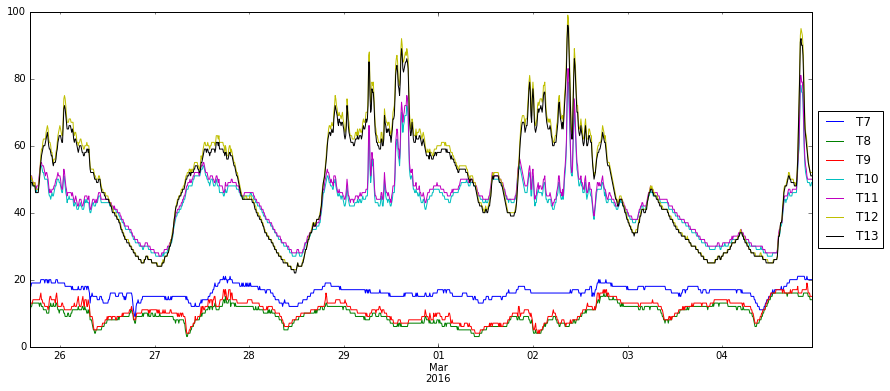

In [273]:
df_temp.ix[:,8:15].plot(figsize=(14,6)).legend(loc='center left', bbox_to_anchor=(1, 0.5));

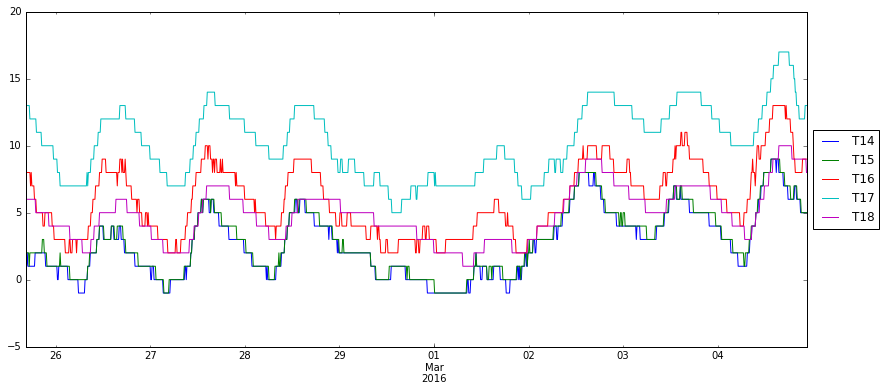

In [274]:
df_temp.ix[:,15:20].plot(figsize=(14,6)).legend(loc='center left', bbox_to_anchor=(1, 0.5));

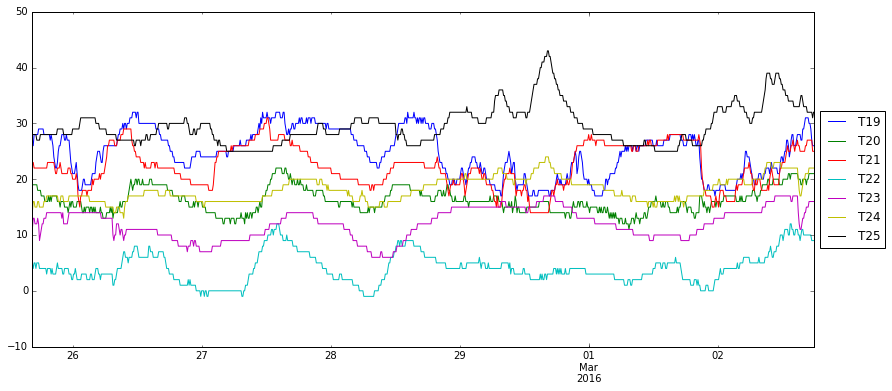

In [268]:
df_temp.ix[:,20:].plot(figsize=(14,6)).legend(loc='center left', bbox_to_anchor=(1, 0.5));

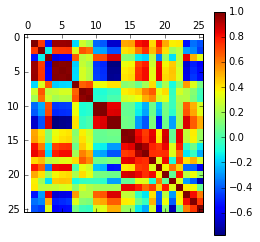

In [227]:
#Correlationsmatrix der Temperaturen
fig=plt.figure(figsize=(12,12));
plt.matshow(df_temp.corr());
plt.colorbar();

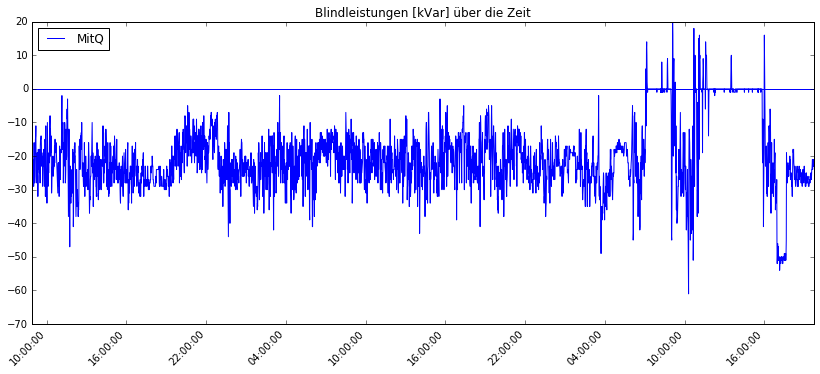

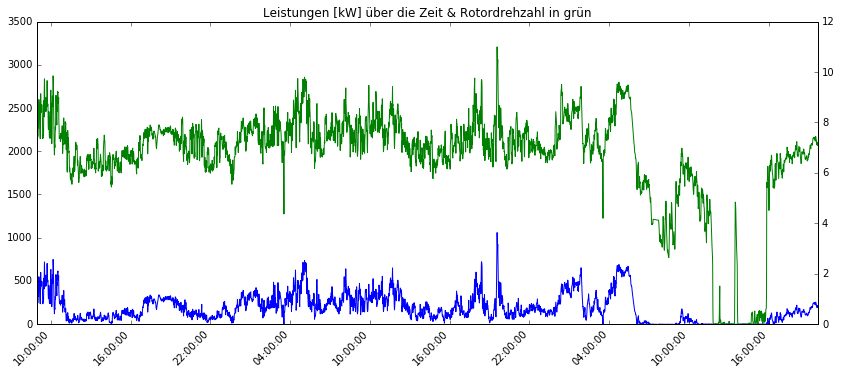

In [372]:
df[['MitQ']].plot(rot=45,figsize=(14,6))
plt.title(u'Blindleistungen [kVar] über die Zeit');
plt.axhline(0)
plt.show()
df['MitP'].plot(rot=45,ylim=(0,3500),figsize=(14,6))
df[u'MitNRotor'].plot(secondary_y=True,rot=45,figsize=(14,6))
plt.title(u'Leistungen [kW] über die Zeit & Rotordrehzahl in grün');